In [1]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
def gray_img_plot(cut_gray_img, mid_y, max_x, min_x, target, label_name, img_name):
    # gray scale image
    value_list = []
    value_list.append(cut_gray_img[mid_y])
    # value_list.append(cut_gray_img[top])
    # value_list.append(cut_gray_img[bottom])
    filter_value = savgol_filter(value_list[0], window_length=60, polyorder=2)
    value_list.append(filter_value)

    plt.figure(figsize=(8, 4))
    plt.title('gray channel')
    plt.plot(value_list[0], color='green', alpha=0.5, label=f'Row mid')
    plt.plot(value_list[1], color='red', label=f'Row smoothed mid')
    # plt.plot(value_list[2], color='cyan', alpha=0.5, label=f'Row top')
    # plt.plot(value_list[3], color='magenta', alpha=0.5, label=f'Row bottom')
    plt.scatter(x=target, y=cut_gray_img[mid_y, target], color='blue', label=f'Boundary Value')
    plt.axvline(x=target, color='blue', linestyle='--', label='Boundary Line')
    plt.xlabel('Pixel Index')
    plt.ylabel('Pixel value')
    plt.xlim(0, max_x - min_x)

    # save_name = f"{label_name}_{img_name}_gray.png"
    # plt.savefig(os.path.join("./images", label_name, save_name), dpi=300, bbox_inches='tight')
    plt.show()

    print(type(filter_value))
    return filter_value

In [3]:
def red_img_plot(red_channel, mid_y, max_x, min_x, target, label_name, img_name):
    # red channel image
    value_list = []
    value_list.append(red_channel[mid_y])
    # value_list.append(red_channel[top])
    # value_list.append(red_channel[bottom])
    value_list.append(savgol_filter(value_list[0], window_length=60, polyorder=3))

    plt.figure(figsize=(8, 4))
    plt.title('r channel')
    plt.plot(value_list[0], color='green', alpha=0.5, label=f'Row mid')
    plt.plot(value_list[1], color='red', label=f'Row smoothed mid')
    # plt.plot(value_list[2], color='cyan', alpha=0.5, label=f'Row top')
    # plt.plot(value_list[3], color='magenta', alpha=0.5, label=f'Row bottom')
    plt.scatter(x=target, y=red_channel[mid_y, target], color='blue', label=f'Boundary Value')
    plt.axvline(x=target, color='blue', linestyle='--', label='Boundary Line')
    plt.xlabel('Pixel Index')
    plt.ylabel('Pixel value')
    plt.xlim(0, max_x - min_x)

    save_name = f"{label_name}_{img_name}_r.png"
    plt.savefig(os.path.join("./images", label_name, save_name), dpi=300, bbox_inches='tight')
    plt.show()

In [4]:
def green_img_plot(green_channel, mid_y, max_x, min_x, target, label_name, img_name):
    # green channel image
    value_list = []
    value_list.append(green_channel[mid_y])
    # value_list.append(green_channel[top])
    # value_list.append(green_channel[bottom])
    value_list.append(savgol_filter(value_list[0], window_length=60, polyorder=3))

    plt.figure(figsize=(8, 4))
    plt.title('g channel')
    plt.plot(value_list[0], color='green', alpha=0.5, label=f'Row mid')
    plt.plot(value_list[1], color='red', label=f'Row smoothed mid')
    # plt.plot(value_list[2], color='cyan', alpha=0.5, label=f'Row top')
    # plt.plot(value_list[3], color='magenta', alpha=0.5, label=f'Row bottom')
    plt.scatter(x=target, y=green_channel[mid_y, target], color='blue', label=f'Boundary Value')
    plt.axvline(x=target, color='blue', linestyle='--', label='Boundary Line')
    plt.xlabel('Pixel Index')
    plt.ylabel('Pixel value')
    plt.xlim(0, max_x - min_x)

    save_name = f"{label_name}_{img_name}_g.png"
    plt.savefig(os.path.join("./images", label_name, save_name), dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
def blue_img_plot(blue_channel, mid_y, max_x, min_x, target, label_name, img_name):
    # blue channel image
    value_list = []
    value_list.append(blue_channel[mid_y])
    # value_list.append(blue_channel[top])
    # value_list.append(blue_channel[bottom])
    value_list.append(savgol_filter(value_list[0], window_length=60, polyorder=3))

    plt.figure(figsize=(8, 4))
    plt.title('b channel')
    plt.plot(value_list[0], color='green', alpha=0.5, label=f'Row mid')
    plt.plot(value_list[1], color='red', label=f'Row smoothed mid')
    # plt.plot(value_list[2], color='cyan', alpha=0.5, label=f'Row top')
    # plt.plot(value_list[3], color='magenta', alpha=0.5, label=f'Row bottom')
    plt.scatter(x=target, y=blue_channel[mid_y, target], color='blue', label=f'Boundary Value')
    plt.axvline(x=target, color='blue', linestyle='--', label='Boundary Line')
    plt.xlabel('Pixel Index')
    plt.ylabel('Pixel value')
    plt.xlim(0, max_x - min_x)

    save_name = f"{label_name}_{img_name}_b.png"
    plt.savefig(os.path.join("./images", label_name, save_name), dpi=300, bbox_inches='tight')
    plt.show()

In [6]:
max_y, min_y = 850, 450
max_x, min_x = 1230, 530
h, w = max_y - min_y, max_x - min_x
mid_y = (max_y - min_y) // 2

In [7]:
data_list = glob.glob(os.path.join("images", "*", "*","*.jpg"))
print(len(data_list))

500


In [54]:
idx = 0
img_name = data_list[idx].split("\\")[-1]
brightness = data_list[idx].split("\\")[-2]
label_name = data_list[idx].split("\\")[-3]
print(label_name, brightness, img_name, sep="\\")

ori_img = cv2.imread(data_list[idx])
gray_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2GRAY)

cv2.imshow("asdf", gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

7\1\WIN_20250515_13_40_59_Pro.jpg


new img shape: 400 700


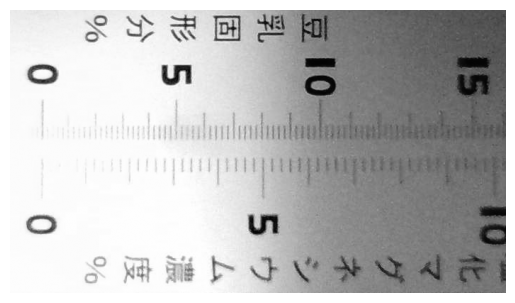

In [11]:
cut_gray_img = gray_img[min_y:max_y, min_x:max_x]
print("new img shape:", cut_gray_img.shape[0], cut_gray_img.shape[1])

plt.figure()
plt.imshow(cut_gray_img, cmap='gray')
plt.axis('off')
plt.show()

cv2.imshow("asdf", cut_gray_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [14]:
if  label_name == "7": target = 316
elif label_name == "7.5": target = 336
elif label_name == "8": target = 356
elif label_name == "8.5": target = 376
elif label_name == "9": target = 396

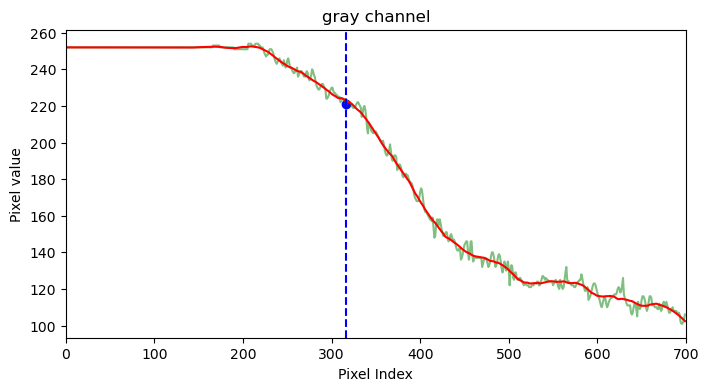

<class 'numpy.ndarray'>


In [15]:
filter_value = gray_img_plot(cut_gray_img, mid_y, max_x, min_x, target, label_name, img_name)

min_index: 402 / min_value: -0.9040322580645161
min_value2_index: 329 / min_value2: -0.4520161290322581
width: 73


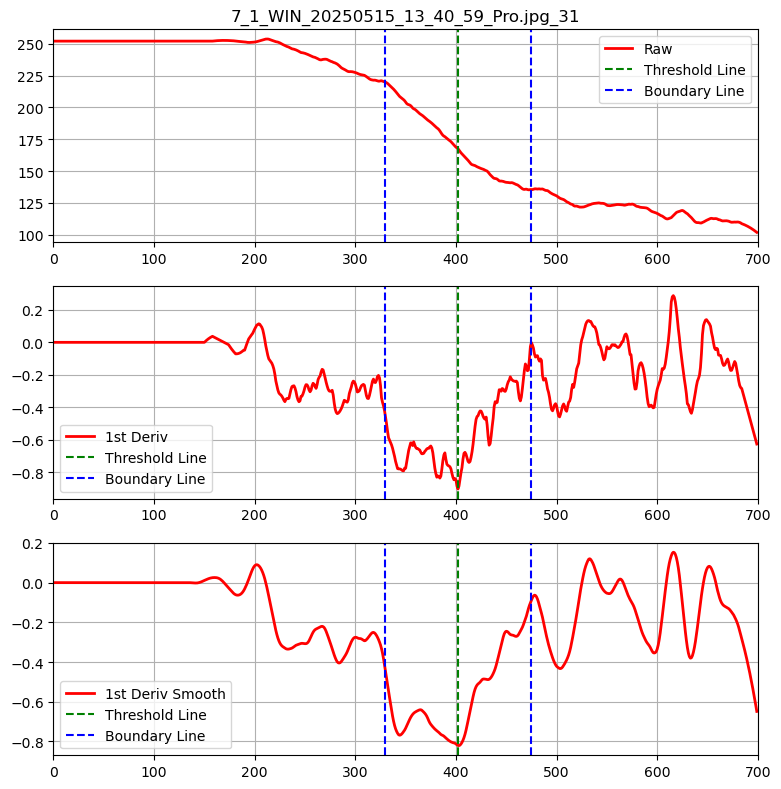

In [16]:
y_raw = cut_gray_img[mid_y, :]
x = np.arange(len(y_raw))

wl = 31
y_smooth = savgol_filter(y_raw, window_length=wl, polyorder=2)
y_deriv = savgol_filter(y_raw, window_length=wl, polyorder=2, deriv=1)
y_deriv_smooth = savgol_filter(y_deriv, window_length=wl, polyorder=2)

min_index = np.argmin(y_deriv)
min_value = y_deriv[min_index]
min_value2 = min_value / 2
min_value2_index = min_index
while min_value2_index > 0:
    if y_deriv[min_value2_index] >= min_value2:
        break
    min_value2_index -= 1
width = min_index - min_value2_index
print("min_index:", min_index, "/ min_value:", min_value)
print("min_value2_index:", min_value2_index, "/ min_value2:", min_value2)
print("width:", width)

# 시각화
plt.figure(figsize=(8, 8))

plt.subplot(3, 1, 1)
plt.title(f'{label_name}_{brightness}_{img_name}_{wl}')
plt.plot(x, y_smooth, color='red', label='Raw', linewidth=2)
plt.axvline(x=min_index, color='green', linestyle='--', label='Threshold Line')
plt.axvline(x=min_value2_index, color='blue', linestyle='--', label='Boundary Line')
plt.axvline(x=min_index+width, color='blue', linestyle='--')
plt.legend()
plt.grid(True)
plt.xlim(0, w)

plt.subplot(3, 1, 2)
plt.plot(x, y_deriv, color='red', label='1st Deriv', linewidth=2)
# plt.axvline(x=target, color='blue', linestyle='--', label='Boundary Line')
plt.axvline(x=min_index, color='green', linestyle='--', label='Threshold Line')
plt.axvline(x=min_value2_index, color='blue', linestyle='--', label='Boundary Line')
plt.axvline(x=min_index+width, color='blue', linestyle='--')
plt.legend()
plt.grid(True)
plt.xlim(0, w)

plt.subplot(3, 1, 3)
plt.plot(x, y_deriv_smooth, color='red', label='1st Deriv Smooth', linewidth=2)
# plt.axvline(x=target, color='blue', linestyle='--', label='Boundary Line')
plt.axvline(x=min_index, color='green', linestyle='--', label='Threshold Line')
plt.axvline(x=min_value2_index, color='blue', linestyle='--', label='Boundary Line')
plt.axvline(x=min_index+width, color='blue', linestyle='--')
plt.legend()
plt.grid(True)
plt.xlim(0, w)

plt.tight_layout()
# plt.savefig(os.path.join("images", "outputs", f"{label_name}_{brightness}_{img_name}.jpg"), dpi=300)

plt.show()

# print(abs(target - min_index))

In [17]:
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv(os.path.join('images', 'outputs', 'rulebase_data700.csv'))

df_brightness_1 = df[df['brightness'] == 1].copy()
df_brightness_2 = df[df['brightness'] == 2].copy()
df_brightness_3 = df[df['brightness'] == 3].copy()
df_brightness_4 = df[df['brightness'] == 4].copy()
df_brightness_5 = df[df['brightness'] == 5].copy()

scaler = MinMaxScaler()
scaled_5 = scaler.fit_transform(df_brightness_5[['min_index', 'width', 'label_name']])
df_brightness_5['min_index_scaled'] = scaled_5[:, 0]
df_brightness_5['width_scaled'] = scaled_5[:, 1]
df_brightness_5['label_scaled'] = scaled_5[:, 2]

scaled_4 = scaler.fit_transform(df_brightness_4[['min_index', 'width', 'label_name']])
df_brightness_4['min_index_scaled'] = scaled_4[:, 0]
df_brightness_4['width_scaled'] = scaled_4[:, 1]
df_brightness_4['label_scaled'] = scaled_4[:, 2]

scaled_3 = scaler.fit_transform(df_brightness_3[['min_index', 'width', 'label_name']])
df_brightness_3['min_index_scaled'] = scaled_3[:, 0]
df_brightness_3['width_scaled'] = scaled_3[:, 1]
df_brightness_3['label_scaled'] = scaled_3[:, 2]

scaled_2 = scaler.fit_transform(df_brightness_2[['min_index', 'width', 'label_name']])
df_brightness_2['min_index_scaled'] = scaled_2[:, 0]
df_brightness_2['width_scaled'] = scaled_2[:, 1]
df_brightness_2['label_scaled'] = scaled_2[:, 2]

scaled_1 = scaler.fit_transform(df_brightness_1[['min_index', 'width', 'label_name']])
df_brightness_1['min_index_scaled'] = scaled_1[:, 0]
df_brightness_1['width_scaled'] = scaled_1[:, 1]
df_brightness_1['label_scaled'] = scaled_1[:, 2]

print(np.unique(df_brightness_5['label_scaled']))

[0.   0.25 0.5  0.75 1.  ]


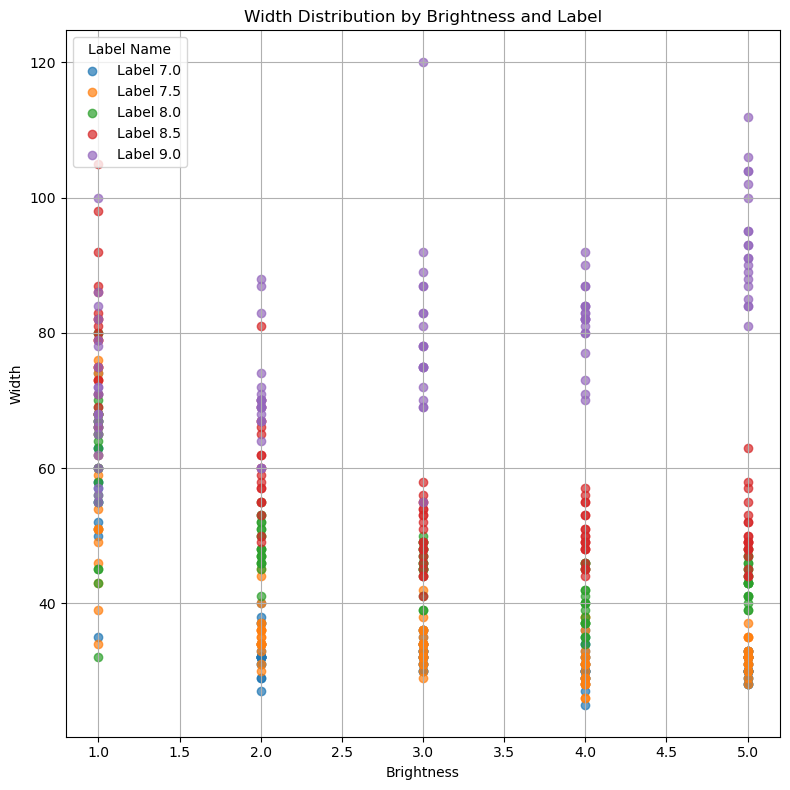

In [18]:
plt.figure(figsize=(8, 8))
for label in df['label_name'].unique():
    subset = df[df['label_name'] == label]
    plt.scatter(subset['brightness'], subset['width'], label=f'Label {label}', alpha=0.7)

plt.title('Width Distribution by Brightness and Label')
plt.xlabel('Brightness')
plt.ylabel('Width')
plt.legend(title='Label Name')
plt.grid(True)
plt.tight_layout()
plt.show()

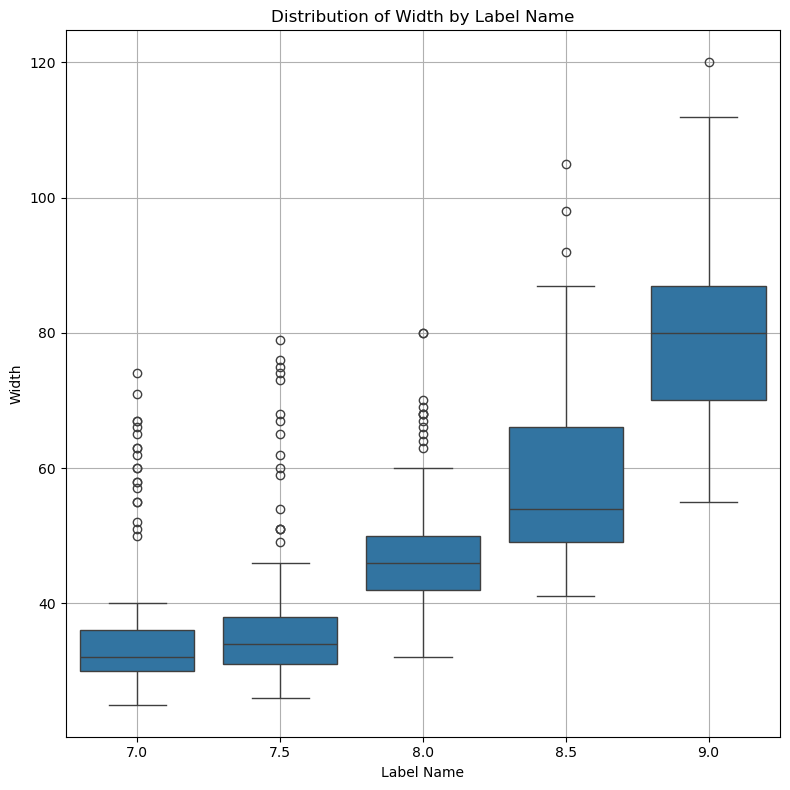

In [19]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='label_name', y='width', data=df)

plt.xlabel('Label Name')
plt.ylabel('Width')
plt.title('Distribution of Width by Label Name')
plt.grid(True)
plt.tight_layout()
plt.show()

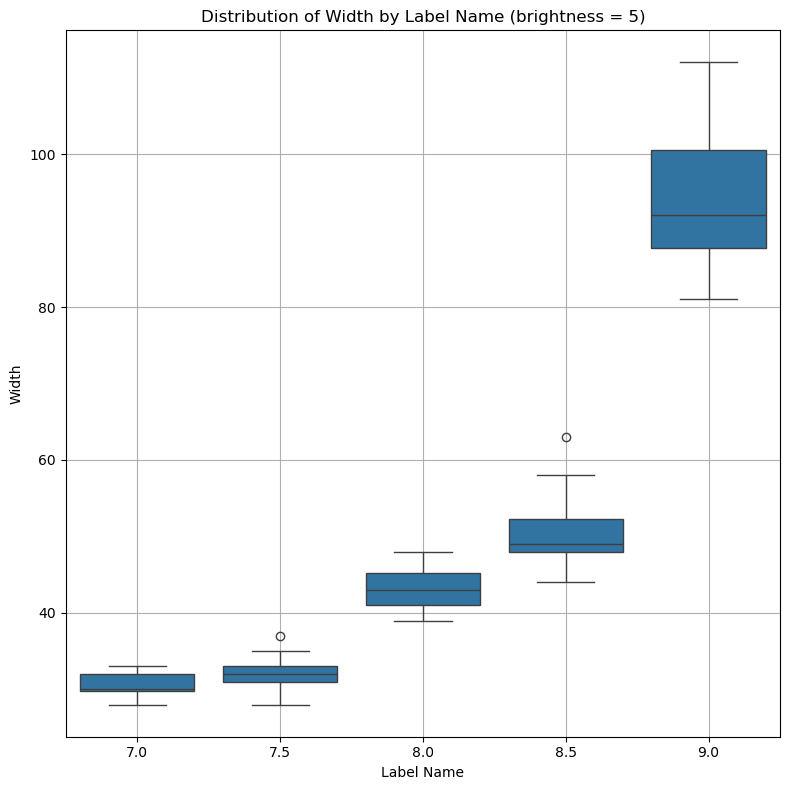

In [20]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='label_name', y='width', data=df_brightness_5)

plt.xlabel('Label Name')
plt.ylabel('Width')
plt.title('Distribution of Width by Label Name (brightness = 5)')
plt.grid(True)
plt.tight_layout()
plt.show()

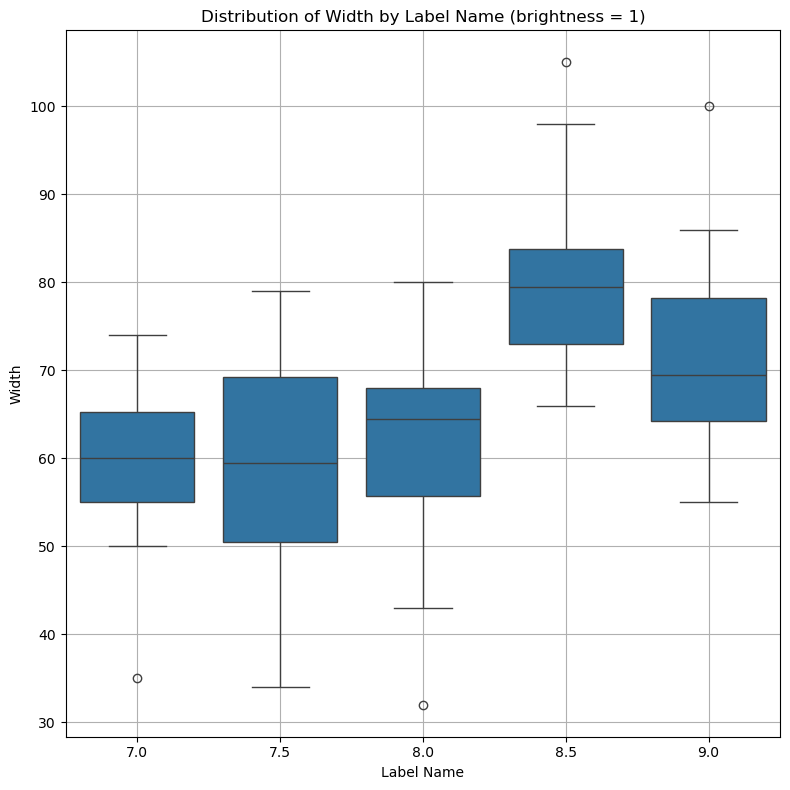

In [21]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='label_name', y='width', data=df_brightness_1)

plt.xlabel('Label Name')
plt.ylabel('Width')
plt.title('Distribution of Width by Label Name (brightness = 1)')
plt.grid(True)
plt.tight_layout()
plt.show()

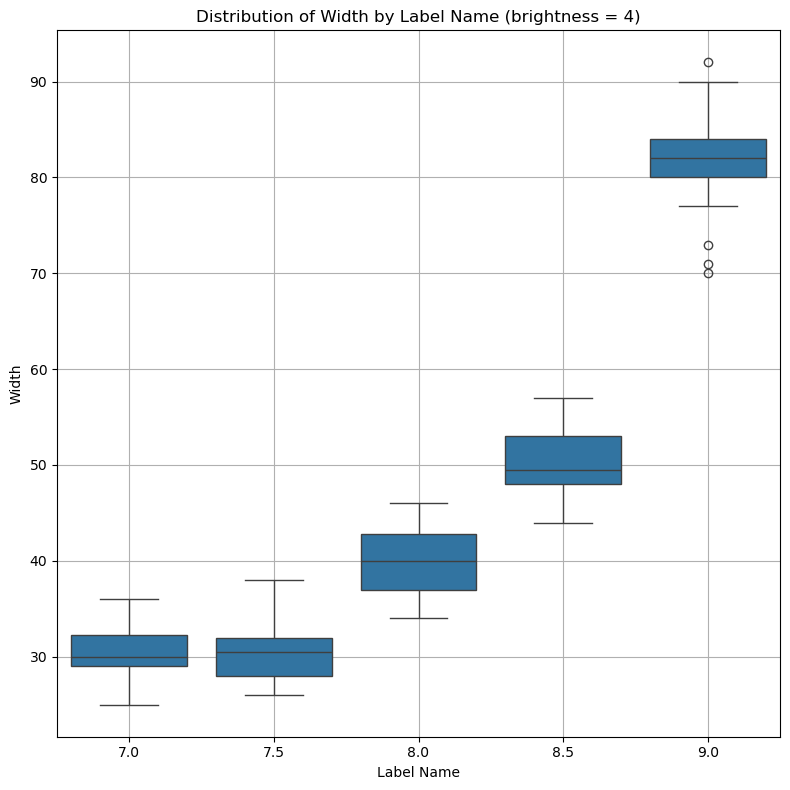

In [22]:
plt.figure(figsize=(8, 8))
sns.boxplot(x='label_name', y='width', data=df_brightness_4)

plt.xlabel('Label Name')
plt.ylabel('Width')
plt.title('Distribution of Width by Label Name (brightness = 4)')
plt.grid(True)
plt.tight_layout()
plt.show()

Slope: 28.929999999999975, Intercept: -181.37999999999982


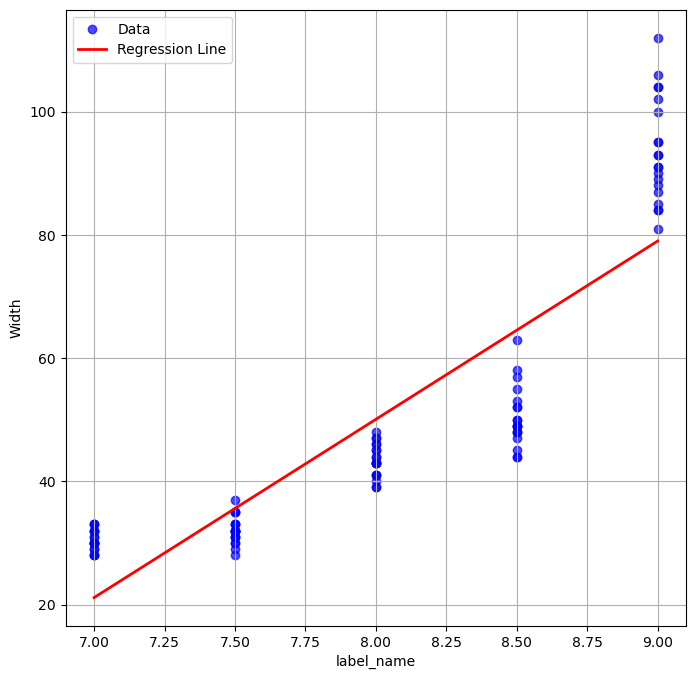

In [23]:
x = df_brightness_5['label_name'].values
y = df_brightness_5['width'].values

coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
y_pred = np.polyval(coefficients, x)

print(f"Slope: {slope}, Intercept: {intercept}")

plt.figure(figsize=(8, 8))
plt.scatter(x, y, label='Data', color='blue', alpha=0.7)
plt.plot(x, y_pred, label='Regression Line', color='red', linewidth=2)
plt.xlabel('label_name')
plt.ylabel('Width')
plt.legend()
plt.grid(True)
plt.show()

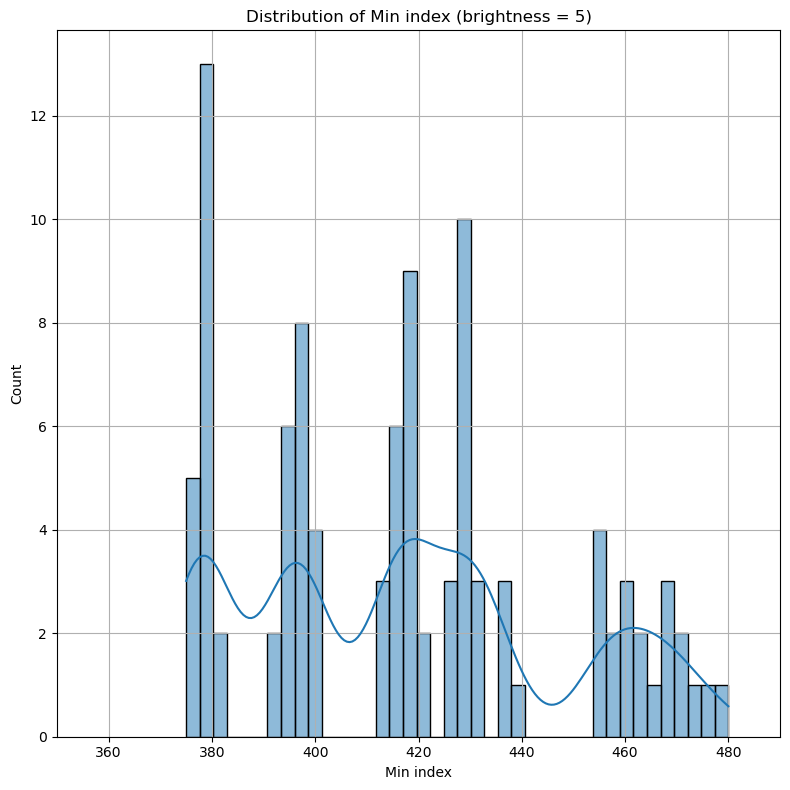

In [24]:
plt.figure(figsize=(8, 8))
sns.histplot(df_brightness_5['min_index'], kde=True, bins=40, kde_kws={'bw_adjust': 0.5})

plt.xlabel('Min index')
plt.ylabel('Count')
plt.title('Distribution of Min index (brightness = 5)')
plt.xlim(350, 490)
plt.grid(True)
plt.tight_layout()
plt.show()


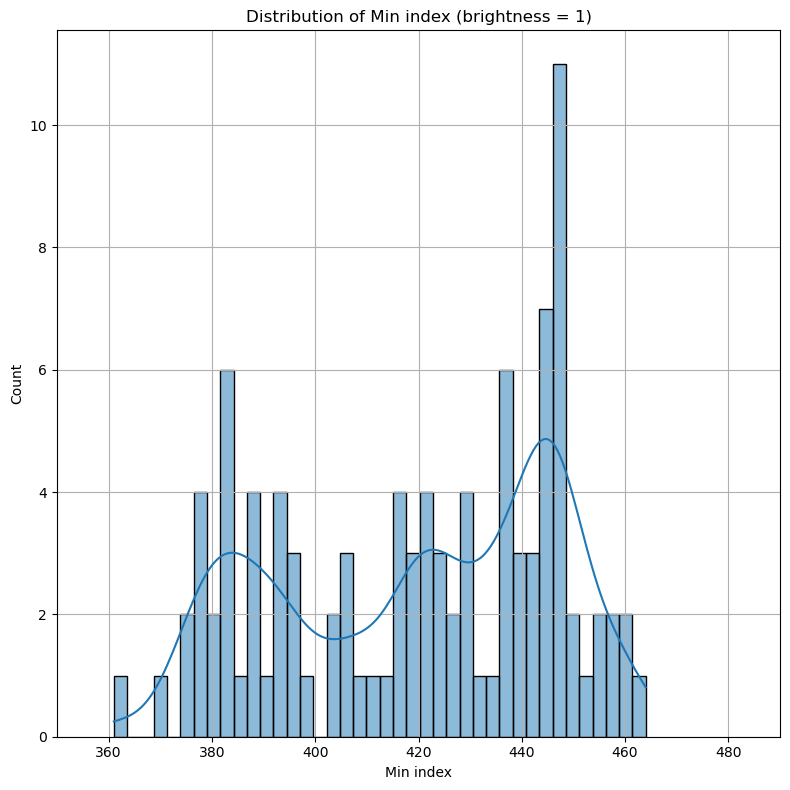

In [25]:
plt.figure(figsize=(8, 8))
sns.histplot(df_brightness_1['min_index'], kde=True, bins=40, kde_kws={'bw_adjust': 0.5})

plt.xlabel('Min index')
plt.ylabel('Count')
plt.title('Distribution of Min index (brightness = 1)')
plt.xlim(350, 490)
plt.grid(True)
plt.tight_layout()
plt.show()


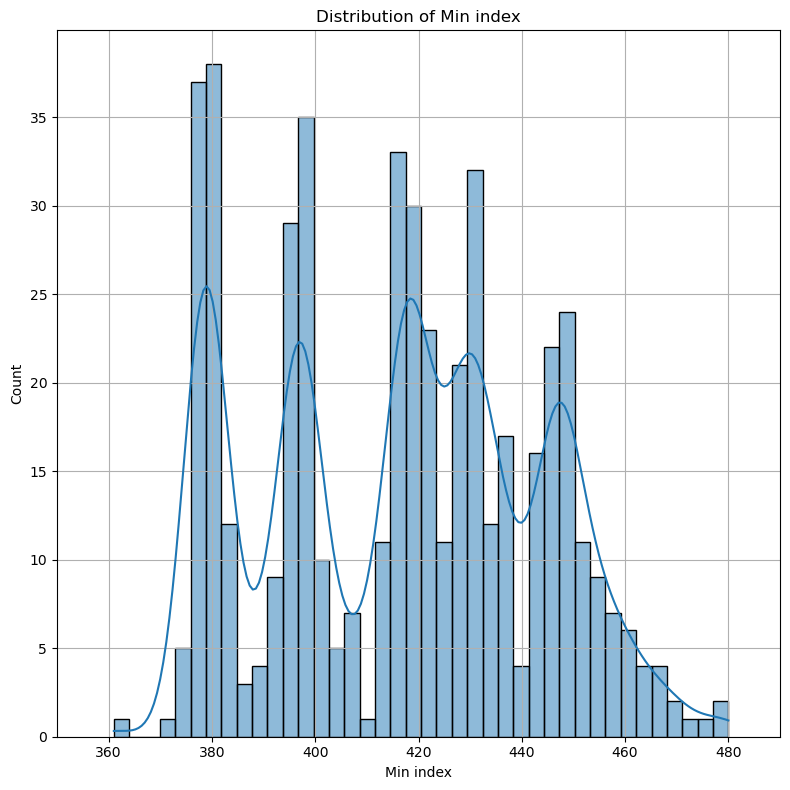

In [26]:
plt.figure(figsize=(8, 8))
sns.histplot(df['min_index'], kde=True, bins=40, kde_kws={'bw_adjust': 0.5})

plt.xlabel('Min index')
plt.ylabel('Count')
plt.title('Distribution of Min index')
plt.xlim(350, 490)
plt.grid(True)
plt.tight_layout()
plt.show()


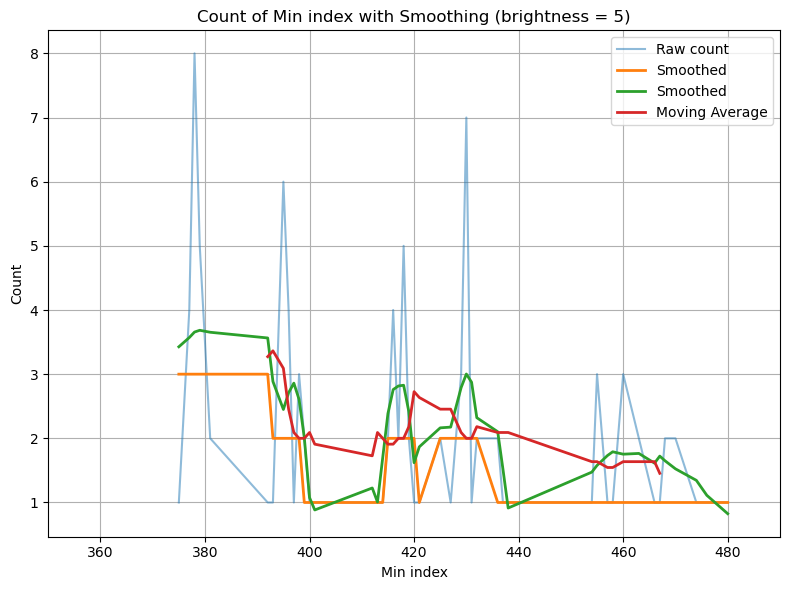

In [27]:
from scipy.ndimage import gaussian_filter1d

# 1) 각 min_index 값별 개수 세기
counts = df_brightness_5['min_index'].value_counts().sort_index()

# 2) 인덱스와 개수 추출
indices = counts.index.values
values = counts.values

# 3) 개수 데이터 스무딩 (가우시안 필터 사용)
gau_smoothed_values = gaussian_filter1d(values, sigma=2)
sav_smoothed_values = savgol_filter(values, window_length=11, polyorder=2)

window_size = 11
rolling_series = pd.Series(values).rolling(window=11, center=True)
movavg_smoothed_values = rolling_series.mean().to_numpy()

# 4) 그래프 그리기
plt.figure(figsize=(8, 6))
plt.plot(indices, values, label='Raw count', alpha=0.5)
plt.plot(indices, gau_smoothed_values, label='Smoothed', linewidth=2)
plt.plot(indices, sav_smoothed_values, label='Smoothed', linewidth=2)
plt.plot(indices, movavg_smoothed_values, label='Moving Average', linewidth=2)

plt.xlabel('Min index')
plt.ylabel('Count')
plt.title('Count of Min index with Smoothing (brightness = 5)')
plt.xlim(350, 490)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

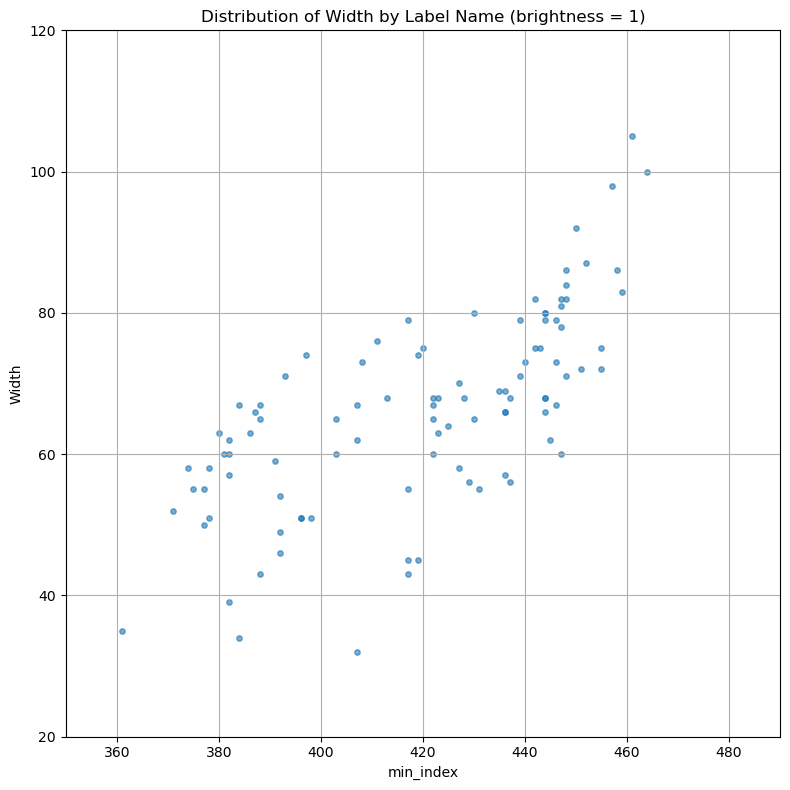

In [28]:
plt.figure(figsize=(8, 8))
plt.scatter(df_brightness_1['min_index'], df_brightness_1['width'], alpha=0.6, s=15)

plt.xlabel('min_index')
plt.ylabel('Width')
plt.title('Distribution of Width by Label Name (brightness = 1)')
plt.xlim(350, 490)
plt.ylim(20, 120)
plt.grid(True)
plt.tight_layout()
plt.show()

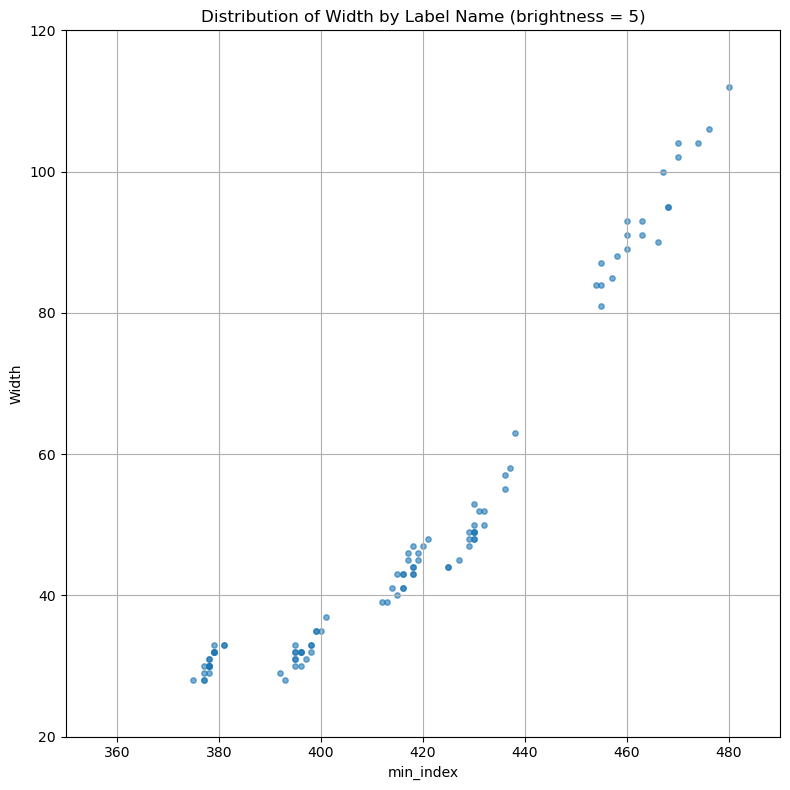

In [29]:
plt.figure(figsize=(8, 8))
plt.scatter(df_brightness_5['min_index'], df_brightness_5['width'], alpha=0.6, s=15)

plt.xlabel('min_index')
plt.ylabel('Width')
plt.title('Distribution of Width by Label Name (brightness = 5)')
plt.xlim(350, 490)
plt.ylim(20, 120)
plt.grid(True)
plt.tight_layout()
plt.show()

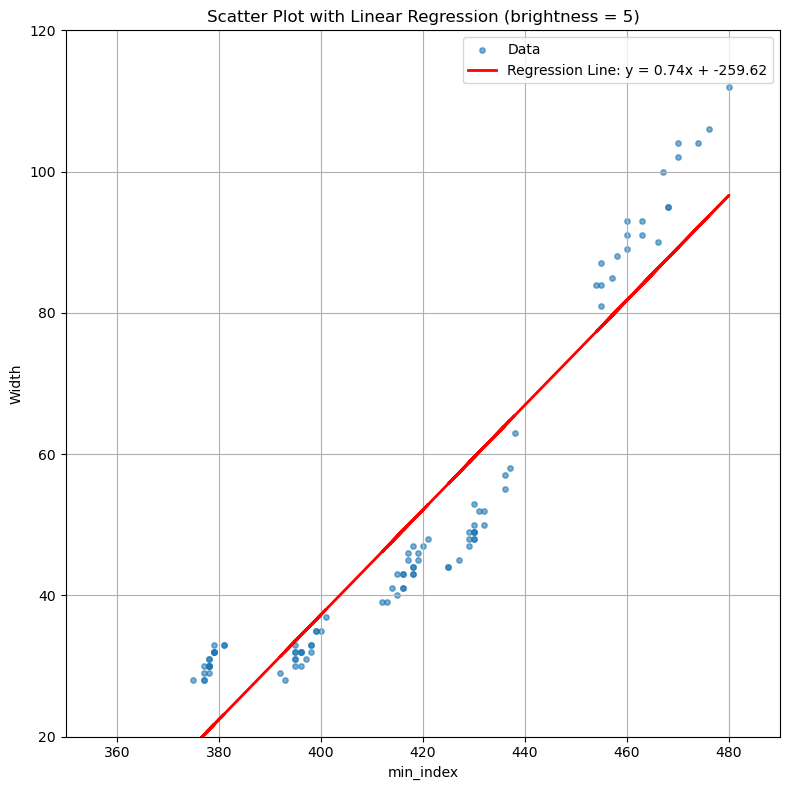

In [30]:
x = df_brightness_5['min_index'].values
y = df_brightness_5['width'].values

coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
y_pred = np.polyval(coefficients, x)

plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.6, s=15, label='Data')
plt.plot(x, y_pred, color='red', linewidth=2,
         label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('min_index')
plt.ylabel('Width')
plt.title('Scatter Plot with Linear Regression (brightness = 5)')
plt.legend()
plt.xlim(350, 490)
plt.ylim(20, 120)
plt.grid(True)
plt.tight_layout()
plt.show()

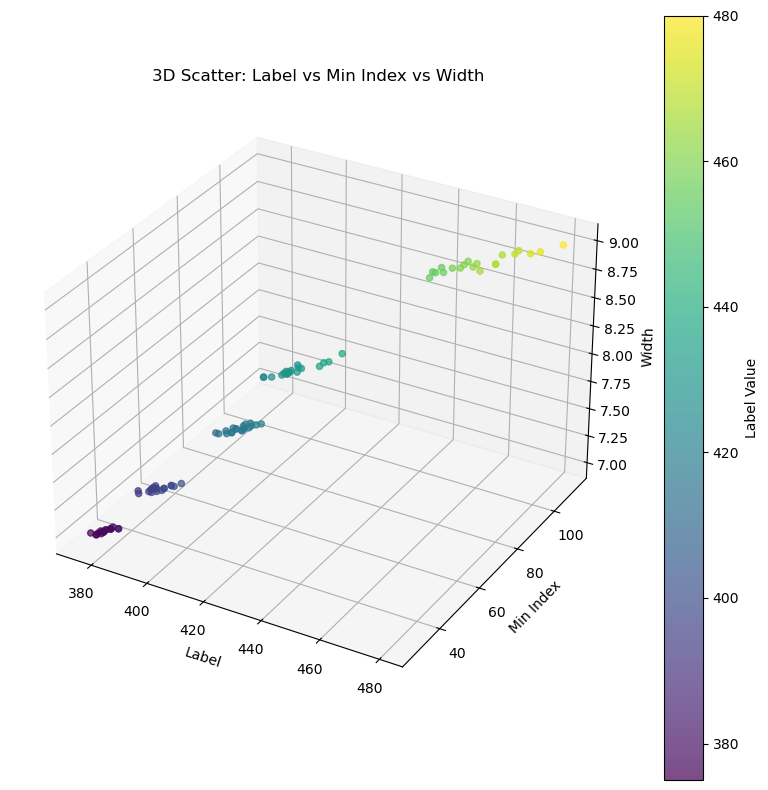

In [31]:
z = df_brightness_5['label_name'].astype(float).values
x = df_brightness_5['min_index'].values
y = df_brightness_5['width'].values

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=x, cmap='viridis', alpha=0.7, s=20)

ax.set_xlabel('Label')
ax.set_ylabel('Min Index')
ax.set_zlabel('Width')
ax.set_title('3D Scatter: Label vs Min Index vs Width')

plt.colorbar(sc, label='Label Value')
plt.tight_layout()
plt.show()


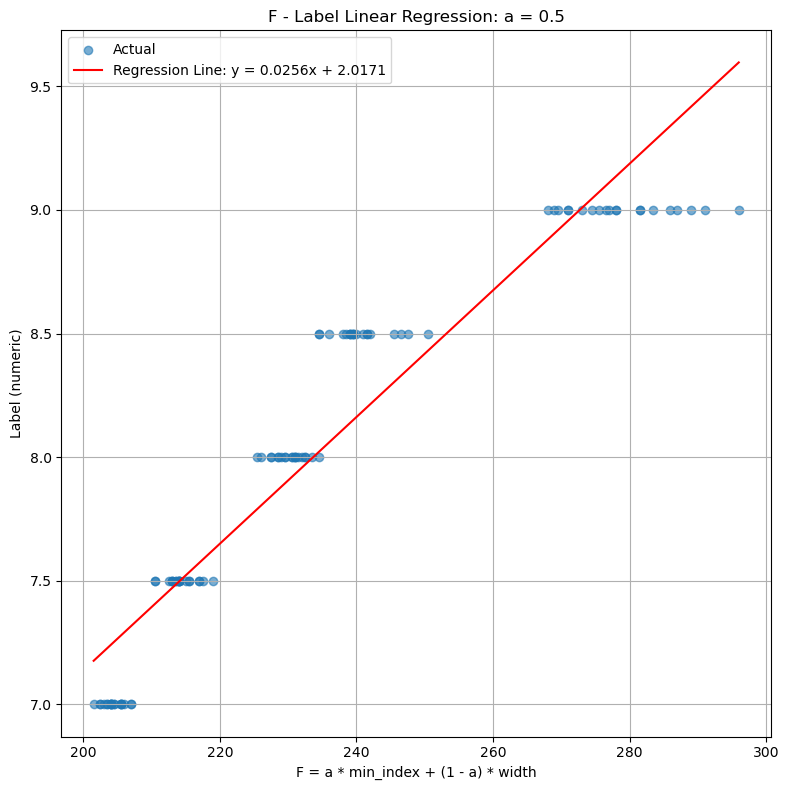

In [32]:
x = df_brightness_5['min_index'].values
y = df_brightness_5['width'].values

a = 0.5
F = x * a + y * (1 - a)

label_list = df_brightness_5['label_name'].values

coefficients_F = np.polyfit(F, label_list, 1)
slope_F, intercept_F = coefficients_F
label_pred = np.polyval(coefficients_F, F)

plt.figure(figsize=(8, 8))
plt.scatter(F, label_list, alpha=0.6, label='Actual')
plt.plot(np.sort(F), np.polyval(coefficients_F, np.sort(F)), color='red',
         label=f'Regression Line: y = {slope_F:.4f}x + {intercept_F:.4f}')
plt.xlabel('F = a * min_index + (1 - a) * width')
plt.ylabel('Label (numeric)')
plt.title(f'F - Label Linear Regression: a = {a}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

최적의 a: 1.0000
회귀식: label = 0.0234 * F + -1.7583
최소 MSE: 0.0186


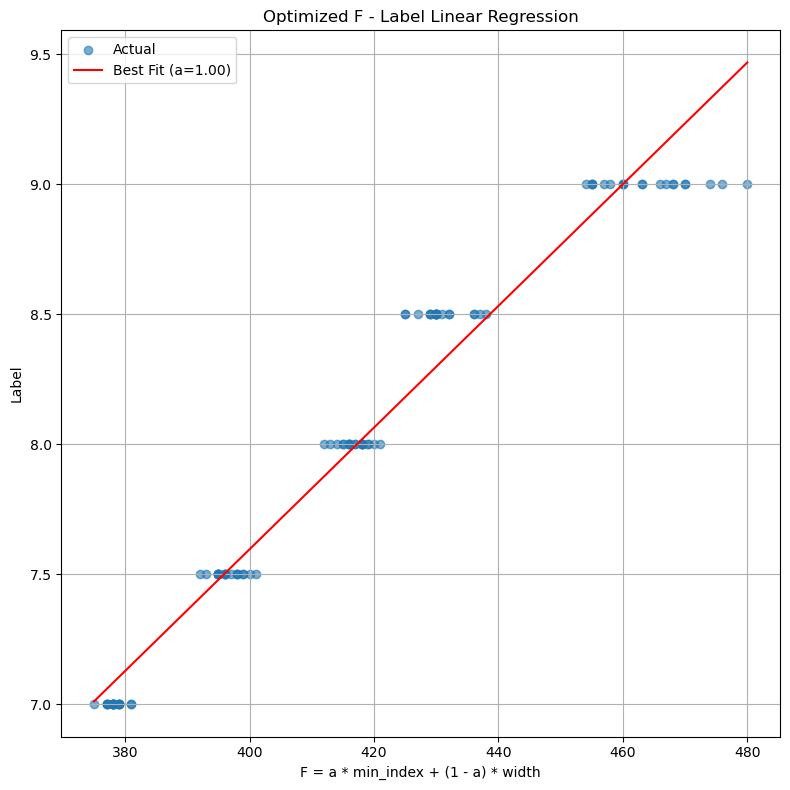

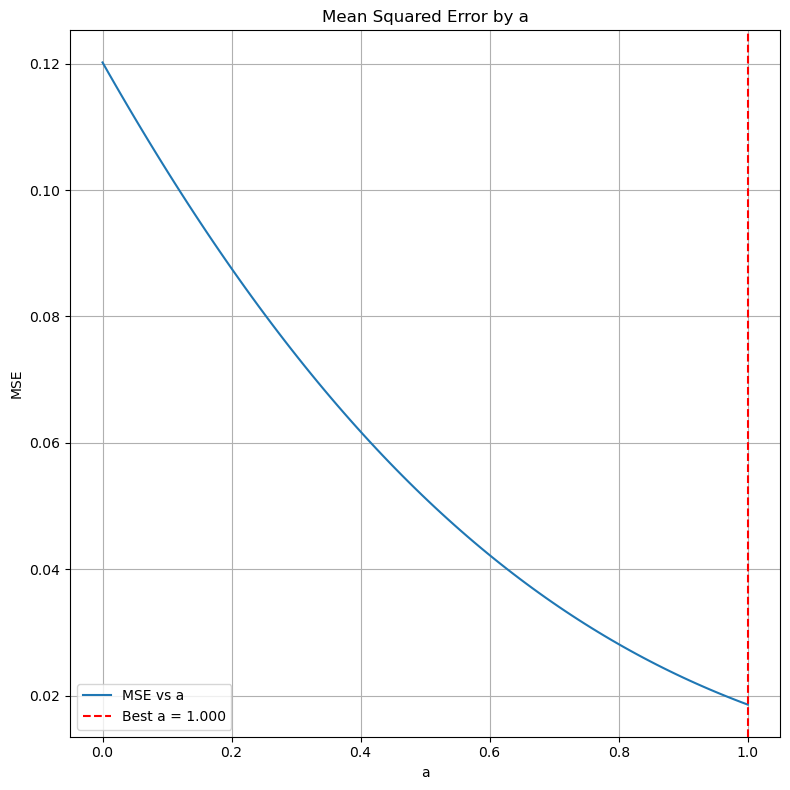

In [33]:
x = df_brightness_5['min_index'].values
y = df_brightness_5['width'].values
label = df_brightness_5['label_name'].values

a_values = np.linspace(0, 1, 100)
errors = []
best_a = None
min_mse = float('inf')
best_fit = None

for a in a_values:
    F = x * a + y * (1 - a)
    coeffs = np.polyfit(F, label, 1)
    label_pred = np.polyval(coeffs, F)
    mse = mean_squared_error(label, label_pred)
    errors.append(mse)

    if mse < min_mse:
        min_mse = mse
        best_a = a
        best_fit = coeffs

F_best = x * best_a + y * (1 - best_a)
slope_best, intercept_best = best_fit
label_pred_best = np.polyval(best_fit, F_best)

print(f"최적의 a: {best_a:.4f}")
print(f"회귀식: label = {slope_best:.4f} * F + {intercept_best:.4f}")
print(f"최소 MSE: {min_mse:.4f}")

plt.figure(figsize=(8, 8))
plt.scatter(F_best, label, alpha=0.6, label='Actual')
plt.plot(np.sort(F_best), np.polyval(best_fit, np.sort(F_best)), color='red',
         label=f'Best Fit (a={best_a:.2f})')
plt.xlabel('F = a * min_index + (1 - a) * width')
plt.ylabel('Label')
plt.title('Optimized F - Label Linear Regression')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(a_values, errors, label='MSE vs a')
plt.axvline(x=best_a, color='red', linestyle='--', label=f'Best a = {best_a:.3f}')
plt.xlabel('a')
plt.ylabel('MSE')
plt.title('Mean Squared Error by a')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


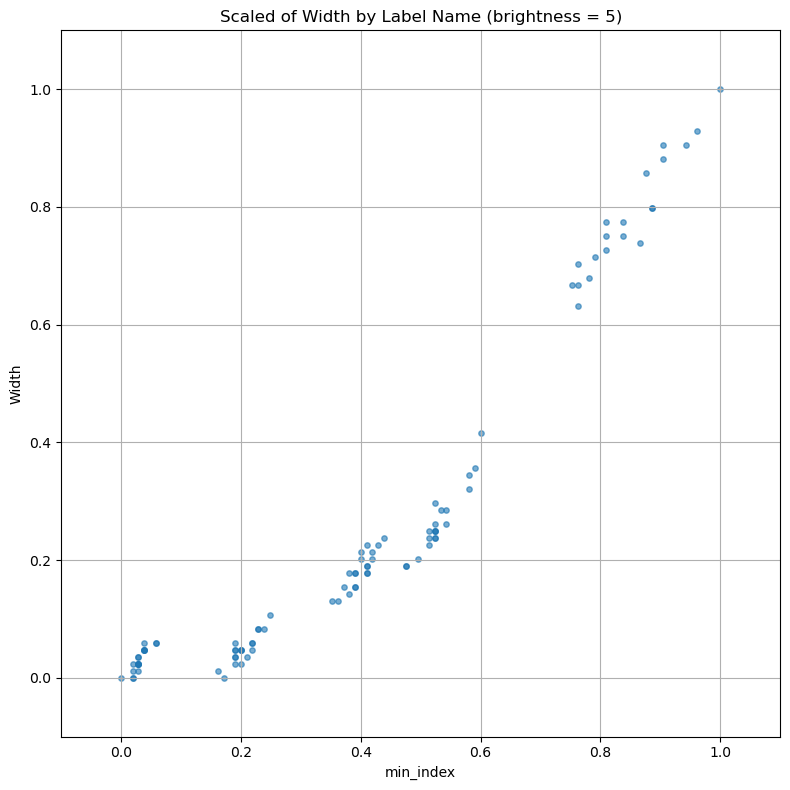

In [34]:
plt.figure(figsize=(8, 8))
plt.scatter(df_brightness_5['min_index_scaled'], df_brightness_5['width_scaled'], alpha=0.6, s=15)

plt.xlabel('min_index')
plt.ylabel('Width')
plt.title('Scaled of Width by Label Name (brightness = 5)')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

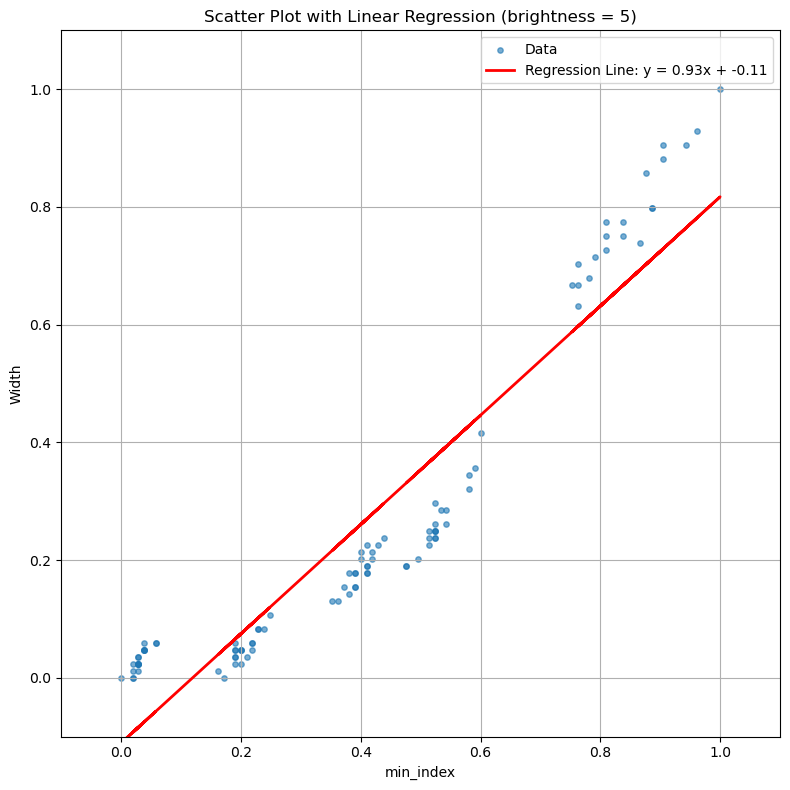

In [35]:
x = df_brightness_5['min_index_scaled'].values
y = df_brightness_5['width_scaled'].values

coefficients = np.polyfit(x, y, 1)
slope, intercept = coefficients
y_pred = np.polyval(coefficients, x)

plt.figure(figsize=(8, 8))
plt.scatter(x, y, alpha=0.6, s=15, label='Data')
plt.plot(x, y_pred, color='red', linewidth=2,
         label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('min_index')
plt.ylabel('Width')
plt.title('Scatter Plot with Linear Regression (brightness = 5)')
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()

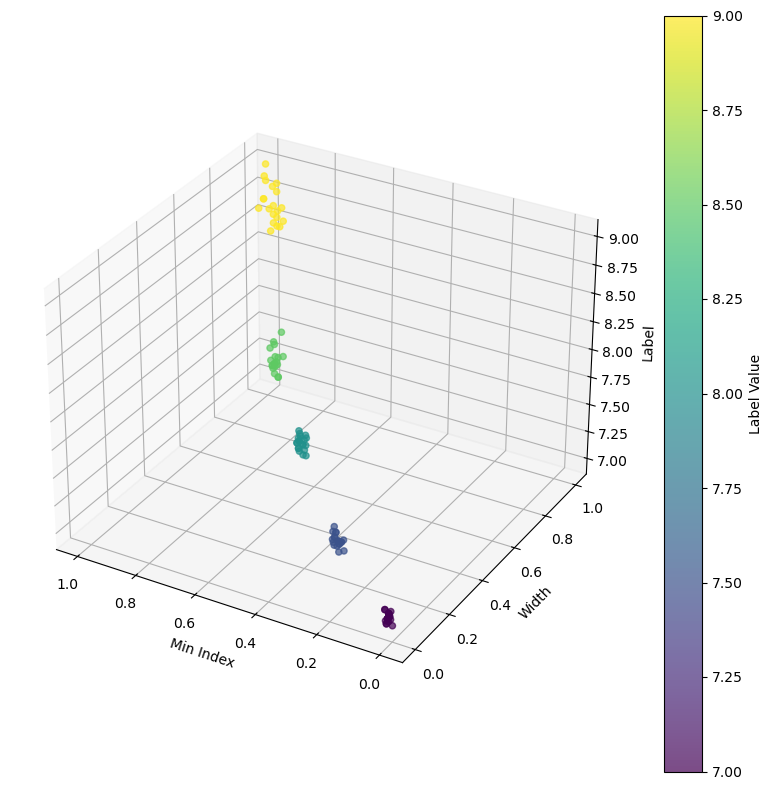

In [50]:
z = df_brightness_5['label_name'].values
x = df_brightness_5['min_index_scaled'].values
y = df_brightness_5['width_scaled'].values

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(x, y, z, c=z, cmap='viridis', alpha=0.7, s=20)

ax.set_zlabel('Label')
ax.set_xlabel('Min Index')
ax.set_ylabel('Width')

ax.invert_xaxis()

plt.colorbar(sc, label='Label Value')
plt.tight_layout()
plt.show()


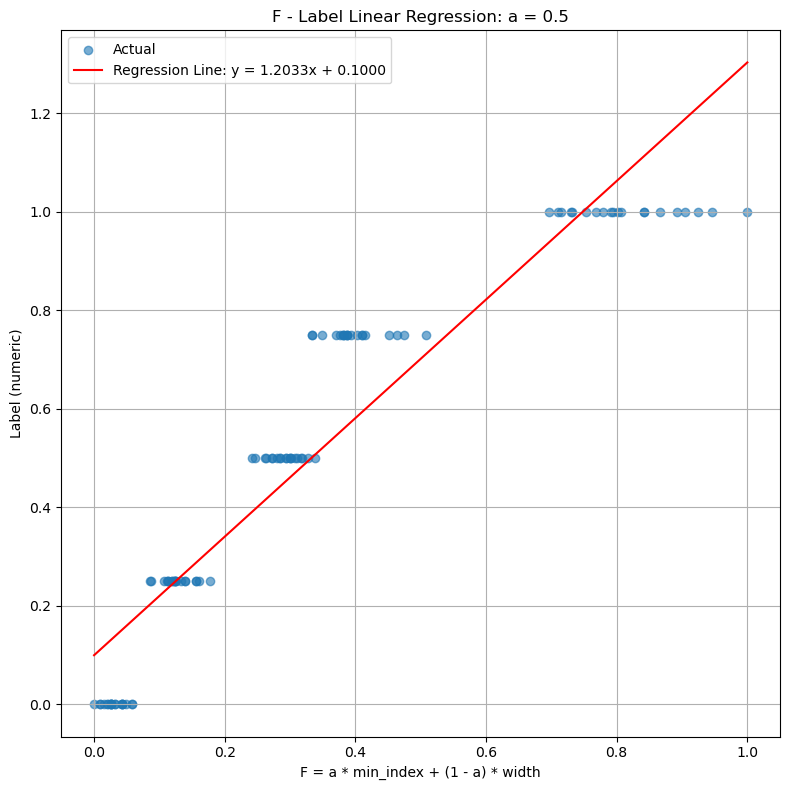

In [37]:
x = df_brightness_5['min_index_scaled'].values
y = df_brightness_5['width_scaled'].values

a = 0.5
F = x * a + y * (1 - a)

label_list = df_brightness_5['label_scaled'].values

coefficients_F = np.polyfit(F, label_list, 1)
slope_F, intercept_F = coefficients_F
label_pred = np.polyval(coefficients_F, F)

plt.figure(figsize=(8, 8))
plt.scatter(F, label_list, alpha=0.6, label='Actual')
plt.plot(np.sort(F), np.polyval(coefficients_F, np.sort(F)), color='red',
         label=f'Regression Line: y = {slope_F:.4f}x + {intercept_F:.4f}')
plt.xlabel('F = a * min_index + (1 - a) * width')
plt.ylabel('Label (numeric)')
plt.title(f'F - Label Linear Regression: a = {a}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

최적의 a: 1.0000
회귀식: label = 2.4557 * F + 7.0121
최소 MSE: 0.0186


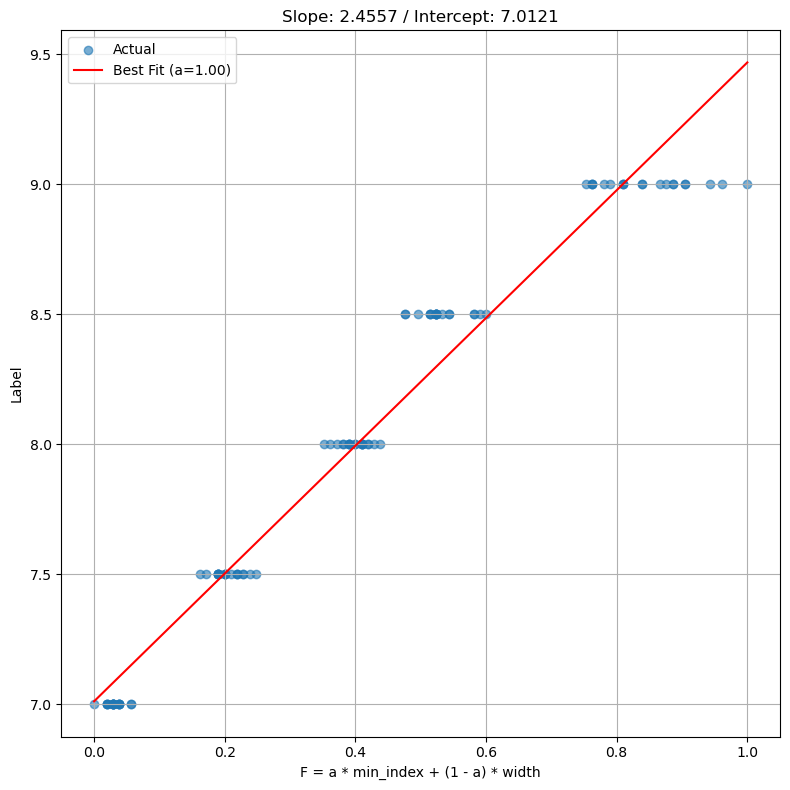

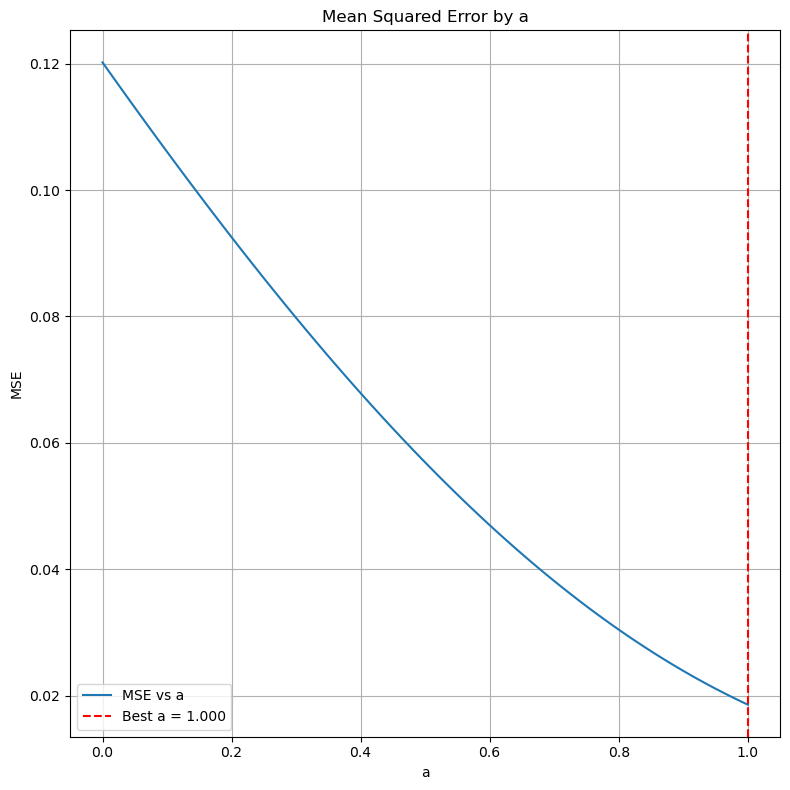

In [38]:
x = df_brightness_5['min_index_scaled'].values
y = df_brightness_5['width_scaled'].values
label = df_brightness_5['label_name'].values

a_values = np.linspace(0, 1, 100)
errors = []
best_a = None
min_mse = float('inf')
best_fit = None

for a in a_values:
    F = x * a + y * (1 - a)
    coeffs = np.polyfit(F, label, 1)
    label_pred = np.polyval(coeffs, F)
    mse = mean_squared_error(label, label_pred)
    errors.append(mse)

    if mse < min_mse:
        min_mse = mse
        best_a = a
        best_fit = coeffs

F_best = x * best_a + y * (1 - best_a)
slope_best, intercept_best = best_fit
label_pred_best = np.polyval(best_fit, F_best)

print(f"최적의 a: {best_a:.4f}")
print(f"회귀식: label = {slope_best:.4f} * F + {intercept_best:.4f}")
print(f"최소 MSE: {min_mse:.4f}")

plt.figure(figsize=(8, 8))
plt.scatter(F_best, label, alpha=0.6, label='Actual')
plt.plot(np.sort(F_best), np.polyval(best_fit, np.sort(F_best)), color='red',
         label=f'Best Fit (a={best_a:.2f})')
plt.xlabel('F = a * min_index + (1 - a) * width')
plt.ylabel('Label')
plt.title(f"Slope: {slope_best:.4f} / Intercept: {intercept_best:.4f}")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(a_values, errors, label='MSE vs a')
plt.axvline(x=best_a, color='red', linestyle='--', label=f'Best a = {best_a:.3f}')
plt.xlabel('a')
plt.ylabel('MSE')
plt.title('Mean Squared Error by a')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


주성분 벡터 (weights): [[0.71128424 0.7029045 ]]
설명된 분산량 (eigenvalue): [0.15457399]
설명된 분산 비율: [0.96907884]
평균 (중심화 기준): [0.40228571 0.26261905]


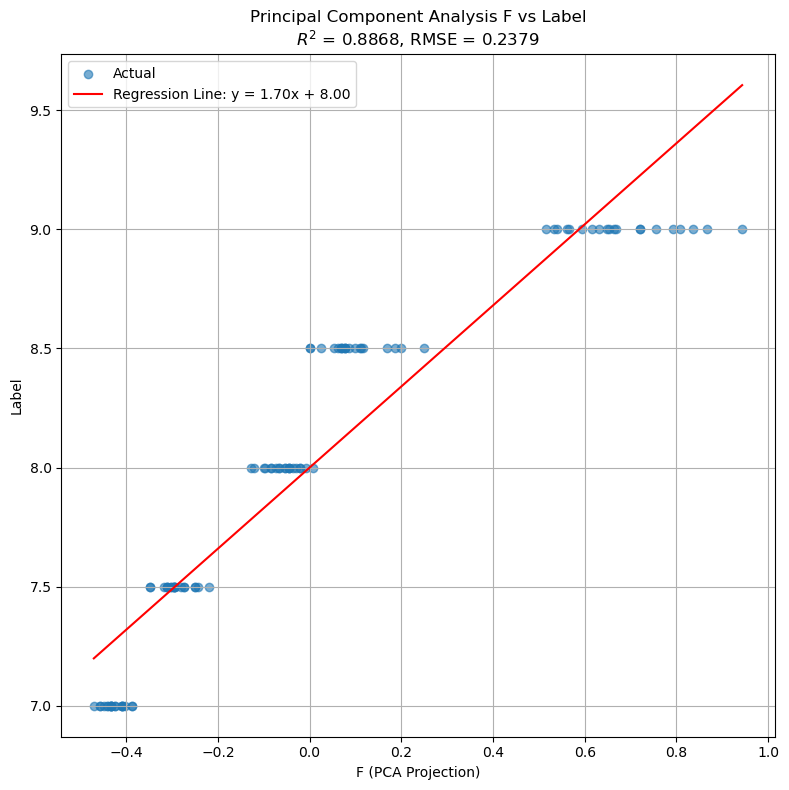

In [39]:
from sklearn.decomposition import PCA

X = df_brightness_5[['min_index_scaled', 'width_scaled']].values
pca = PCA(n_components=1)
F = pca.fit_transform(X).flatten()
y = df_brightness_5['label_name'].values

coefficients = np.polyfit(F, y, 1)
slope, intercept = coefficients
y_pred = np.polyval(coefficients, F)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

# 주요 결과들
print("주성분 벡터 (weights):", pca.components_)  # (1, 2) 행렬
print("설명된 분산량 (eigenvalue):", pca.explained_variance_)  # (1,)
print("설명된 분산 비율:", pca.explained_variance_ratio_)  # (1,)
print("평균 (중심화 기준):", pca.mean_)  # (2,)

plt.figure(figsize=(8, 8))
plt.scatter(F, y, alpha=0.6, label='Actual')
plt.plot(np.sort(F), np.polyval(coefficients, np.sort(F)), color='red',
         label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('F (PCA Projection)')
plt.ylabel('Label')
plt.title(f'Principal Component Analysis F vs Label\n$R^2$ = {r2:.4f}, RMSE = {rmse:.4f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

(100, 2) (100,)
회귀 계수 (weights): [ 3.41585731 -1.0348884 ]
절편 (intercept): 6.897630805205716


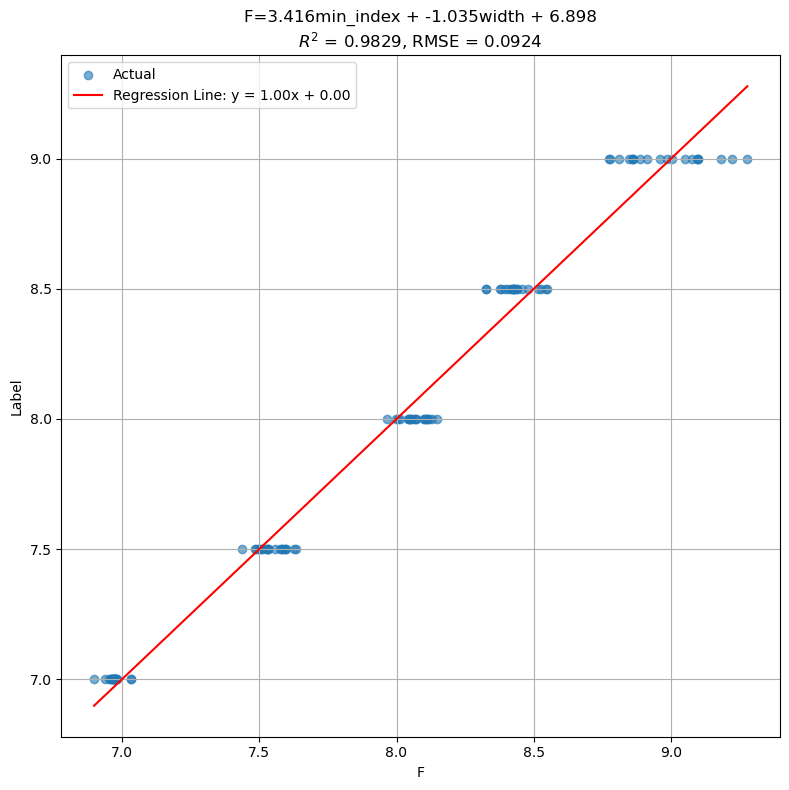

In [40]:
from sklearn.linear_model import LinearRegression

X = df_brightness_5[['min_index_scaled', 'width_scaled']].values
y = df_brightness_5['label_name'].values
print(X.shape, y.shape)
reg = LinearRegression()
reg.fit(X, y)
F = reg.predict(X)

print("회귀 계수 (weights):", reg.coef_)
print("절편 (intercept):", reg.intercept_)

coefficients = np.polyfit(F, y, 1)
slope, intercept = coefficients
y_pred = np.polyval(coefficients, F)

r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

plt.figure(figsize=(8, 8))
plt.scatter(F, y, alpha=0.6, label='Actual')
plt.plot(np.sort(F), np.polyval(coefficients, np.sort(F)), color='red',
         label=f'Regression Line: y = {slope:.2f}x + {intercept:.2f}')
plt.xlabel('F')
plt.ylabel('Label')
plt.title(f'F={reg.coef_[0]:.3f}min_index + {reg.coef_[1]:.3f}width + {reg.intercept_:.3f}\n$R^2$ = {r2:.4f}, RMSE = {rmse:.4f}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

다항 특성 이름: ['1' 'x' 'y' 'x^2' 'x y' 'y^2']
회귀 계수: [ 0.          2.22506509  0.91869642  2.7238375  -5.24719325  1.61348757]
절편: 6.911102815530924


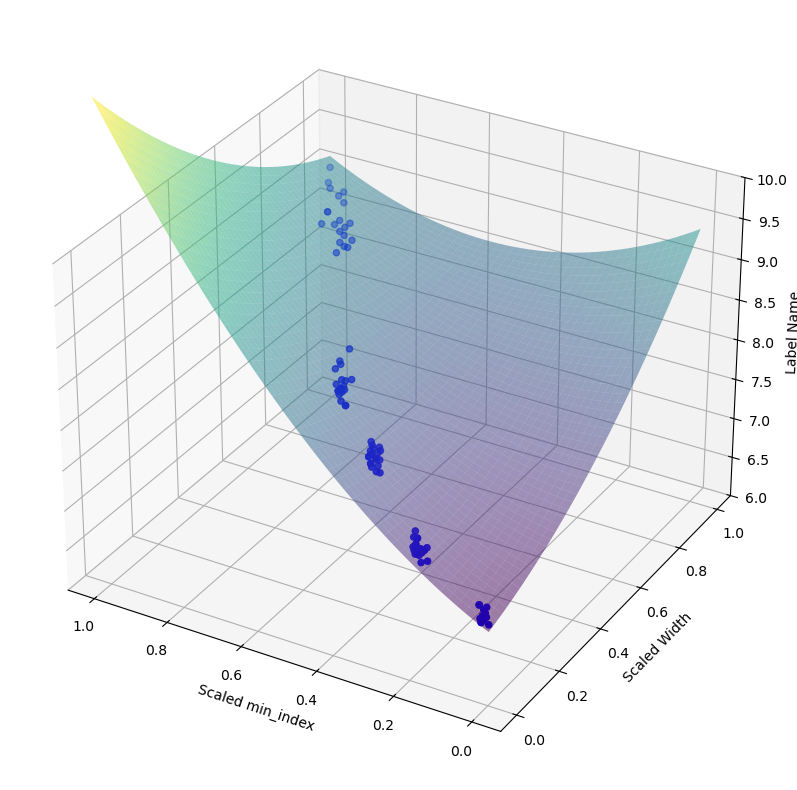

In [52]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

x = df_brightness_5['min_index_scaled'].values
y = df_brightness_5['width_scaled'].values
z = df_brightness_5['label_name'].values

degree = 2
model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
model.fit(np.column_stack((x, y)), z)

lin_reg = model.named_steps['linearregression']
poly = model.named_steps['polynomialfeatures']

print("다항 특성 이름:", poly.get_feature_names_out(['x', 'y']))
print("회귀 계수:", lin_reg.coef_)
print("절편:", lin_reg.intercept_)

xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), 50),
                     np.linspace(y.min(), y.max(), 50))
grid = np.column_stack((xx.ravel(), yy.ravel()))
zz = model.predict(grid).reshape(xx.shape)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, color='blue', label='Original Data')
ax.plot_surface(xx, yy, zz, alpha=0.5, cmap='viridis', edgecolor='none', label='Regression Surface')

ax.set_xlabel('Scaled min_index')
ax.set_ylabel('Scaled Width')
ax.set_zlabel('Label Name')

ax.invert_xaxis()
ax.set_zlim(6, 10)

plt.tight_layout()
plt.show()

In [42]:
# from sklearn.svm import SVR

# model = SVR(kernel='rbf')
# model.fit(np.column_stack((x, y)), z)

In [43]:
# from sklearn.ensemble import RandomForestRegressor

# model = RandomForestRegressor()
# model.fit(np.column_stack((x, y)), z)

In [84]:
# from sklearn.neural_network import MLPRegressor

# model = MLPRegressor(hidden_layer_sizes=(10,10))
# model.fit(np.column_stack((x, y)), z)
